<a href="https://colab.research.google.com/github/BDavidReyesU/Talento-tech/blob/main/NLP_sobre_IMDB_Dataset_of_50K_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [4]:
import pandas as pd

# Importing dataset
df = pd.read_csv("IMDB Dataset.csv")
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [5]:
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [6]:
# Sentiment count
print("Total:\n", df['sentiment'].value_counts())


Total:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [8]:
import pandas as pd

# Cargar el conjunto de datos IMDB
IMDB = pd.read_csv("IMDB Dataset.csv")

review = []
sentences = list(IMDB['review'])
for sen in sentences:
    review.append(sen)


In [9]:
import numpy as np

labels = IMDB['sentiment']
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))


In [10]:
from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20)


In [11]:
# Parameters
vocab_size = 1000
max_length = 120
embedding_dim = 16
trunc_type = 'post'
oov_tok = "<00V>"


In [12]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)


In [15]:
import keras
# Build the model
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [16]:
# Setup the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           16000     
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 64)                122944    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 139009 (543.00 KB)
Trainable params: 139009 (543.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
1250/1250 [==============================] - 17s 12ms/step - loss: 0.4692 - accuracy: 0.7654 - val_loss: 0.4107 - val_accuracy: 0.8101
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.3691 - accuracy: 0.8342 - val_loss: 0.4213 - val_accuracy: 0.8038
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3099 - accuracy: 0.8654 - val_loss: 0.4577 - val_accuracy: 0.7928
Epoch 4/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.2456 - accuracy: 0.9001 - val_loss: 0.5411 - val_accuracy: 0.7801
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.1828 - accuracy: 0.9290 - val_loss: 0.6524 - val_accuracy: 0.7737
Epoch 6/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.1246 - accuracy: 0.9541 - val_loss: 0.8239 - val_accuracy: 0.7669
Epoch 7/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.0774 - accuracy: 0.9757 - val_loss: 1.0017 - val_accurac

<Axes: >

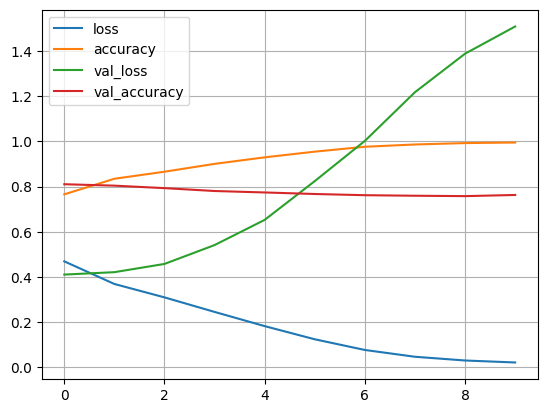

In [18]:
num_epochs = 10  # Define el número de épocas de entrenamiento

# Train the model
history = model.fit(padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)




1. **¿Qué hace el código en general?**
   El código construye un "cerebro" que aprende a entender si las reseñas de películas son positivas o negativas. Luego, le enseñamos a este "cerebro" a partir de ejemplos y luego lo evaluamos.

2. **¿Cuál es el propósito de cada parte del código?**
   Primero, se preparan los datos y luego se entrena el modelo, donde le enseñamos al modelo lo que es una reseña positiva y una negativa. Finalmente, miramos cómo le va al modelo durante el entrenamiento.

3. **¿Por qué se utilizan los parámetros específicos en cada función?**
   Estos parámetros son como ajustes para el modelo. Le decimos al modelo qué tan grande puede ser su "vocabulario" (las palabras que conoce), cuánto puede aprender de cada reseña, cómo de largas pueden ser estas reseñas y cómo debe aprender de los errores.

4. **¿Cuál es la diferencia entre train_sentences y test_sentences?**
   Las `train_sentences` son las reseñas que usamos para enseñar al modelo, como las lecciones en la escuela. Las `test_sentences` son como las preguntas del examen que el modelo tiene que responder después de aprender.

5. **¿Qué significan vocab_size, max_length, embedding_dim y oov_tok?**
   - `vocab_size`: Es cuántas palabras diferentes puede aprender el modelo.
   - `max_length`: Es cuántas palabras en una reseña el modelo considera antes de decidir.
   - `embedding_dim`: Es como el tamaño de las gafas del modelo para leer el mundo de las reseñas.
   - `oov_tok`: Es como una etiqueta que usa el modelo para decir "no conozco esta palabra".

6. **¿Por qué se utilizan las capas Embedding, Flatten, Dense y sigmoid en el modelo?**
   - `Embedding`: Es como el cerebro aprende el significado de cada palabra.
   - `Flatten`: Es como aplanar una pizza para poder ponerla en una caja.
   - `Dense`: Es como conectar diferentes partes del cerebro.
   - `sigmoid`: Es como una luz que se enciende cuando el cerebro piensa que una reseña es positiva.

7. **¿Qué representan las métricas de pérdida y precisión en el modelo?**
   - La pérdida (`loss`) es como el modelo se siente cuando se equivoca.
   - La precisión (`accuracy`) es como el modelo se da cuenta de cuántas preguntas respondió correctamente.

8. **¿Qué pasa durante el entrenamiento del modelo?**
   Es como enseñar a un perro nuevos trucos. El modelo intenta aprender de los ejemplos que le damos y trata de mejorar en cada ronda de práctica.

9. **¿Qué significa las épocas y cómo afectan al proceso de entrenamiento?**
   Las épocas son como vueltas alrededor de la pista de carreras. Cuantas más vueltas, más oportunidades tiene el modelo de mejorar.

10. **¿Por qué es importante la validación del modelo utilizando los datos de prueba?**
    Queremos asegurarnos de que el modelo no solo aprenda de memoria las respuestas, sino que realmente entienda las reseñas. Por eso, lo ponemos a prueba con reseñas que nunca ha visto antes.

11. **¿Cuál es el objetivo final del código?**
    El objetivo es enseñar al modelo a entender las reseñas de películas y luego ver qué tan bien lo hace en el examen para decidir si lo estamos enseñando bien o no.